In [1]:
# Processing Our Data

# First, import Pandas and JSON
import pandas as pd
import json

# Open the file, load it using the json package, then create a dataframe in Pandas using the json_normalize function.
df = pd.read_csv('manual_filtered_travis_tweets_with_blockgroups_with_scores.csv')

In [2]:
# Let's simplify our data by trimming the components of the dataframe we won't be using.
cleaned_df = df[['longitude', 'latitude', 'username', 'tweet_text']]
print(cleaned_df)

      longitude   latitude          username  \
0     30.234932 -97.846291   @MichaelEWebber   
1     30.232050 -97.826526   @oldsheepdog_ay   
2     30.267336 -97.739683    @iwaspoisoned_   
3     30.446025 -97.652614          @schnerk   
4     30.396263 -97.729016     @MichelleS_tv   
...         ...        ...               ...   
2312  30.323445 -97.756980      @rholmes0520   
2313  30.323445 -97.756980      @BigChrizzle   
2314  30.323445 -97.756980  @TexasFancyBoots   
2315  30.323445 -97.756980  @thesecularsaint   
2316  30.323445 -97.756980      @BigChrizzle   

                                             tweet_text  
0     Watching my son at a hot soccer game under the...  
1     Humid ride into work tonight but that max spee...  
2     Walmart, Lucky Charms - Austin, Texas - I have...  
3     Not a bad way to prep for a humid and warm soc...  
4                                 Sunday sweat session   
...                                                 ...  
2312             

In [4]:
import re

# Remove punctuation
cleaned_df['processed_tweet_text'] = \
cleaned_df['tweet_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
cleaned_df['processed_tweet_text'] = \
cleaned_df['processed_tweet_text'].map(lambda x: x.lower())

# Print out the first rows of papers
cleaned_df['processed_tweet_text'].head()

/var/folders/l8/fl56mmzs26l04tpyknvw9cw00000gn/T/ipykernel_83981/2920963320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['processed_tweet_text'] = \
/var/folders/l8/fl56mmzs26l04tpyknvw9cw00000gn/T/ipykernel_83981/2920963320.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['processed_tweet_text'] = \


0    watching my son at a hot soccer game under the...
1    humid ride into work tonight but that max spee...
2    walmart lucky charms - austin texas - i have b...
3    not a bad way to prep for a humid and warm soc...
4                                sunday sweat session 
Name: processed_tweet_text, dtype: object

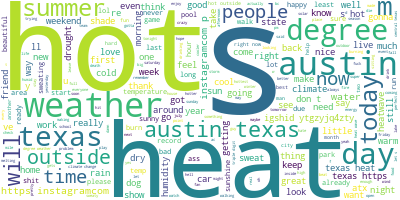

In [9]:
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(cleaned_df['processed_tweet_text'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [11]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = cleaned_df.processed_tweet_text.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])


['watching', 'son', 'hot', 'soccer', 'game', 'shade', 'umbrella']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shashankkot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


In [13]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.018*"heat" + 0.018*"hot" + 0.016*"texas" + 0.011*"austin" + 0.007*"day" + '
  '0.006*"great" + 0.006*"like" + 0.005*"weather" + 0.005*"summer" + '
  '0.005*"get"'),
 (1,
  '0.014*"hot" + 0.012*"weather" + 0.012*"like" + 0.007*"outside" + '
  '0.006*"heat" + 0.006*"degrees" + 0.005*"austin" + 0.005*"thank" + '
  '0.004*"need" + 0.004*"day"'),
 (2,
  '0.020*"austin" + 0.016*"texas" + 0.014*"hot" + 0.013*"https" + '
  '0.011*"weather" + 0.010*"day" + 0.010*"zty" + 0.010*"ytgzyjq" + '
  '0.010*"igshid" + 0.010*"instagramcom"'),
 (3,
  '0.021*"heat" + 0.016*"weather" + 0.015*"texas" + 0.012*"austin" + '
  '0.010*"hot" + 0.007*"people" + 0.005*"https" + 0.005*"like" + 0.004*"love" '
  '+ 0.004*"sweating"'),
 (4,
  '0.022*"heat" + 0.015*"hot" + 0.012*"weather" + 0.009*"today" + '
  '0.008*"austin" + 0.006*"outside" + 0.005*"texas" + 0.004*"cold" + '
  '0.004*"degree" + 0.004*"got"'),
 (5,
  '0.029*"hot" + 0.024*"heat" + 0.016*"texas" + 0.009*"weather" + '
  '0.008*"austin" + 0.006*"

In [17]:

import os 
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis


# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./lda'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './lda'+ str(num_topics) +'.html')

LDAvis_prepared

FileNotFoundError: [Errno 2] No such file or directory: './results/ldavis_prepared_10'

In [19]:
# Now let's visualize the text itself
# We'll stick with a small, random sample of our data to keep things simple

# First, we create a new dataframe by grouping our data based on its sentiment classification.
# For this example, we'll only look at reviews classified as positive
grouped_df = cleaned_df.groupby('sentiment classification')
pos_group = grouped_df.get_group('positive')
random_pos_sample = pos_group.sample(50)
print(random_pos_sample)

      longitude   latitude          username  \
1169  30.323445 -97.756980    @JadaliaGarcia   
2038  30.323445 -97.756980        @AnnaDsays   
398   30.323445 -97.756980          @Legobro   
405   30.336613 -97.718977     @DylanScottTV   
311   30.256750 -97.765022  @TexasFancyBoots   
816   30.323445 -97.756980           @imadni   
1453  30.323445 -97.756980   @GTGrizzlyBears   
2141  30.323445 -97.756980     @TraceySchulz   
1297  30.323445 -97.756980        @cbriancpa   
1649  30.460005 -97.609127    @PurpleHaaZe88   
438   30.323445 -97.756980       @Swarlossss   
926   30.323445 -97.756980  @GivePulseEvents   
862   30.323445 -97.756980    @RatherEarnest   
781   30.323445 -97.756980           @vnvbel   
1937  30.323445 -97.756980          @5onetwo   
1292  30.323445 -97.756980      @kissaliveii   
2075  30.323445 -97.756980   @BengalsGuy1848   
194   30.261923 -97.739752      @danielletsb   
1389  30.323445 -97.756980       @PookRobson   
426   30.221914 -97.619688     @GailAlfa

1169                                I love the texas heat
2038    And what would you like for them to do about i...
398     I’m so glad it cooled off today. It went from ...
405     I know it’s 100 degrees out. \nBUT it’s always...
311     Best course yet; wagyu beef on a hot stone. Le...
816     A little hot this morning but a gray time. Tha...
1453    Feels like 120 degrees outside??  No problem! ...
2141    Ah, downtown Austin… The sticky humidity mixes...
1297                                       Yep, it's hot.
1649                I’m glad it’s not insanely hot today 
438     I’d like to smack whoever in TX energy is out ...
926     #GetInvolved at Severe Weather Rapid Response ...
862     It is so nice. The temperature dropped at leas...
781                  i need 40-70 degree weather like now
1937    98% here. Got mine 2 months after launch. I oc...
1292                     good backyard BBQ weather out rn
2075    It’s hotter than a waffle press at a holiday i...
194     It’s s

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shashankkot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shashankkot/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


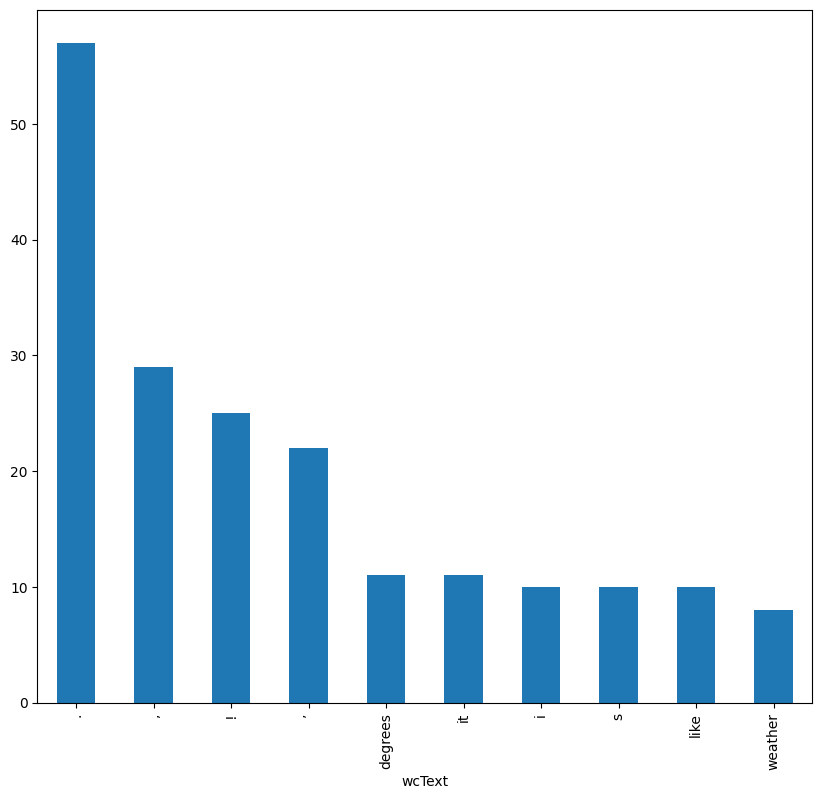

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 2.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


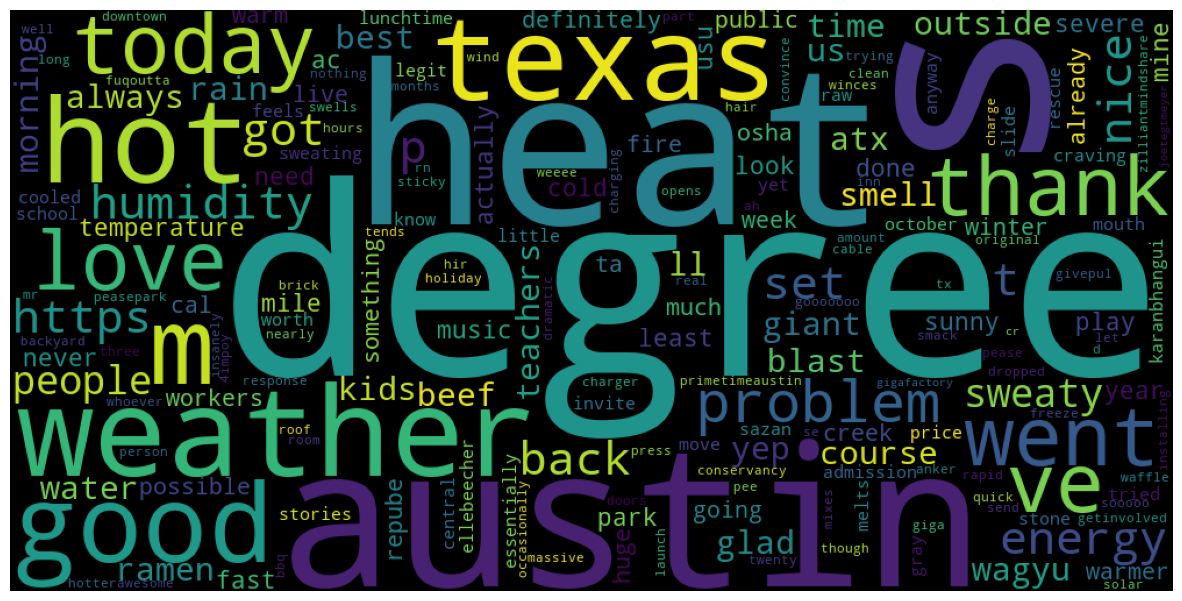

In [21]:
# Now we'll create a wordcloud based on word frequencies in our positive reviews.
# First, we get the data ready for visualization...

# We remove punctuation from the dataframe using a regular expression
random_pos_sample['wcText'] = random_pos_sample['tweet_text'].str.replace('[^\w\s]','')   # Get off the all punctuation!

print(random_pos_sample['wcText'])

# Next we remove the stopwords (these can be modified to include non-english languages)
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords = stopwords.words('english')
# You can add custom stopwords, as well:
# stopwords.append('example')

# Make all of the words in our 'Tokenized Text' column lowercase
random_pos_sample['wcText'] = random_pos_sample['wcText'].str.lower()

# A lambda function is a small, anonymous function.
# A lambda function can take any number of arguments, but can only have one expression.
# Here, we're joining the words not in the stopwords list into a single string.
# This prepares the text for tokenization.
random_pos_sample['wcText'] = random_pos_sample['wcText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))


# Next, tokenize the text into words using NLTK
from nltk import word_tokenize
nltk.download('punkt')

random_pos_sample['wcText'] = random_pos_sample['wcText'].apply(word_tokenize)


# Now we can count the word frequencies in our "Tokenized Text" column
exploded_text = random_pos_sample['wcText'].explode() # Transform each element of a list-like to a row, replicating index values.
print(exploded_text)

word_counts = exploded_text.value_counts()
print(word_counts)


# Bar graph
import matplotlib.pyplot as plt

word_counts.head(10).plot(x="Words", y="Count", kind="bar", figsize=(10, 9))
plt.show()

!pip3 install wordcloud
# Word cloud
from wordcloud import WordCloud

# Convert our exploded_text list to a string
wordcloud_string=(" ").join(exploded_text)

# Generate the word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(wordcloud_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud"+".png", bbox_inches='tight') # removes extra whitespace around our figure
plt.show()
plt.close()

In [22]:
# Finally, let's see what it looks like to train our own sentiment classifier.
# This can be especially useful when working with highly specific data or non-English languages.

# First, we provide our training data as a list of sentences and their sentiment classifications:
training_data = [("It's practical to hope because the hope is for us to survive as a human species.", "pos"),
          ("Italy's soccer players were unlucky to find themselves in a qualifying group with Spain", "neg"),
          ("Instead, root for the Knights whose fans are childlike in their glee.", "pos"),
          ("The overwhelming perception is that the European Union has done very little to alleviate this specifically Italian difficulty.", "neg"),
          ("We are in for a period of painful social conflict, at the end of which perhaps we may remember why it once seemed wise to relegate certain emotions to the stadium.", "neg"),
          ("The heartlessness of that is mind-boggling.", "neg"),
          ("My father was an insatiable learner with intelligence that his baby brother once told me bordered on genius.", "pos"),
        ]

# Training NLTK's Naïve Bayes Classifier with a dictionary created from our list
dictionary = set(word.lower() for passage in training_data for word in word_tokenize(passage[0]))

t = [({word: (word in word_tokenize(x[0])) for word in dictionary}, x[1]) for x in training_data]

classifier = nltk.NaiveBayesClassifier.train(t)

# Let's test out our new classifier on a small sample of our positive reviews:
random_pos_sample_2 = pos_group.sample(10)
sample_texts = random_pos_sample_2['tweet_text']

# Looping through our list of reviews and outputting the classifier's assessments.
for s in sample_texts:
    test_data = s
    test_data_features = {word.lower(): (word in word_tokenize(test_data.lower())) for word in dictionary}

    print(s[:100])
    print("Classification: " + classifier.classify(test_data_features))

Seems like Tennessee is gonna be pretty rainy during my trip this week, but I’m sort of glad to be g
Classification: neg
Mmm that pool was like a hot tub today

#lifeisgood
Classification: neg
Appreciate the input and glad I’m not sweating an easy choice. 
Classification: pos
What a great summery look, Else!  Enjoy patio time!
Classification: neg
My hot homer read a thon. Be nice or be blocked teehee
Classification: neg
Yeah, stuff that court, the standard leftist knee jerk reaction to getting opinions they don’t like.
Classification: neg
growth is realizing your hair isn’t 4c, it was just dehydrated
Classification: neg
It was indeed special, Alan. Thank you for the warm welcome.  It feels good to be back.
Classification: pos
I can’t wait to be back in my apartment, Texas is so hot and I have baseball to play. (Twitch stream
Classification: neg
Eating my way through Austin in 105° heat. Love it.
Classification: neg
